In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# importing the csv file, do basic inspection, dropping NaN values

In [71]:
# depression by level of education 2014 dataset
df_country = pd.read_csv('../data/number-with-depression-by-country.csv')
df_devInd = pd.read_csv('../data/human-development-index.csv')
df_happiness = pd.read_csv('../data/world_happiness_index.csv')
df_depr = pd.read_csv('../data/prevalence-of-depression-by-age.csv')

In [3]:
# functions used to check for mismatches in country names in different csv files
def list_diff(list1, list2): 
    return (list(set(list1) - set(list2))) 

load and inspect df_country

In [4]:
df_country.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,318435.813670
1,Afghanistan,AFG,1991,329044.773956
2,Afghanistan,AFG,1992,382544.572895
3,Afghanistan,AFG,1993,440381.507393
4,Afghanistan,AFG,1994,456916.645489


In [5]:
df_country.rename(columns = {'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)': 'absolute_numbers'}, inplace= True)

In [6]:
df_country_nan = df_country[df_country.isna().any(axis=1)]
entity_list = [i for i in df_country_nan['Entity']]
nan_value_countries = set(entity_list)

Since df_country only have absolute numbers, we wil use df_depr due to the avaibility of the percentage

In [7]:
df_depr.rename(columns ={'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)':'depression_percentage'}, inplace=True)

In [8]:
df_depr = df_depr[['Entity','Code','Year','depression_percentage']]

In [9]:
df_depr.sample(5)

,Entity,Code,Year,depression_percentage
896,Cambodia,KHM,1990,3.161072
2591,Honduras,HND,2005,2.713694
797,Brunei,BRN,2003,2.564558
4748,Saint Lucia,LCA,2006,2.817564
4661,Romania,ROU,2003,2.347841


did a lot of work on pivoting the table, just to realise at the end it would be bad practice, so all codes have been turned to comments

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


#fig, ax1 = plt.subplots(figsize=(15,5))
#plt.plot(country_year_sex.groupby(['year']).agg({'suicides_no':sum}))

In [11]:
def data_country1(country):
    i = df_depr.loc[df_depr['Entity']==country]
    return i

In [12]:
def plot_depr(country):
    fig , ax1 = plt.subplots(figsize=(15,5))
    sns.scatterplot(data=data_country1(country), 
                 x=data_country1(country)['Year'],
                 y=data_country1(country)['depression_percentage'],
                 color='blue',ax=ax1)

#plt.plot(df_depr.groupby(['Year']))

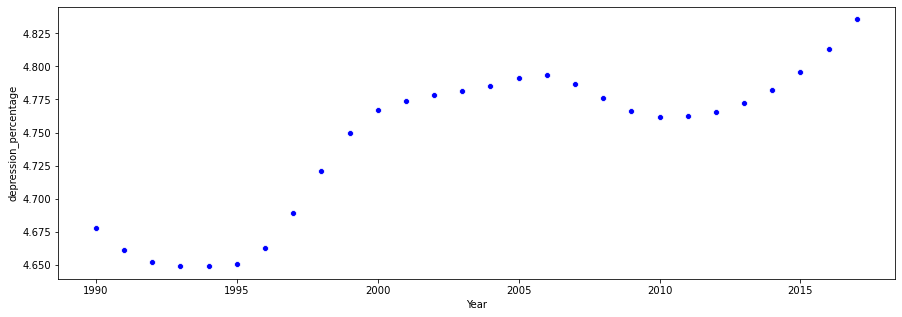

In [13]:
plot_depr('United States')

world rate of depression between 1990 - 2017

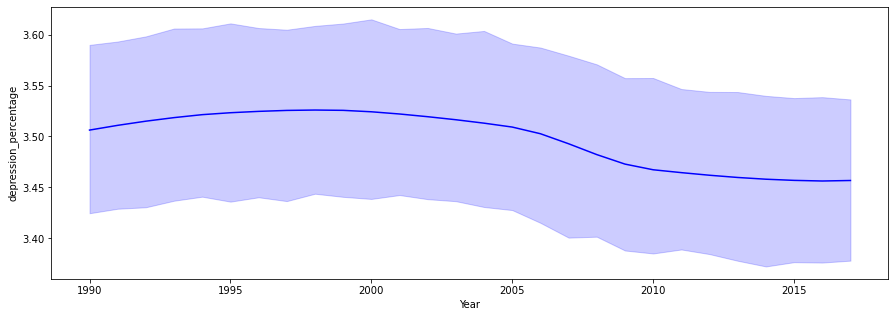

In [61]:
fig , ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=df_depr, x='Year',y='depression_percentage',color='blue',ax=ax)
fig.savefig('depression_world_statics')

In [15]:
# Code practices on pandas.series

In [16]:
# test = df_country.groupby(['Entity']).absolute_numbers.mean()
# test
# type(test)
# indexlist = [i for i in test.index]
# len(indexlist) 
# test.loc['Germany']

In [17]:
# code practices ond pivot_table and multiIndex, here pivot_table is not needed since it would turn the already tidy data into untidy data!

In [18]:
#df_country_pivot = df_country.pivot_table(index=['Entity'], columns=['Year'], values=['absolute_numbers'])
#df_country_pivot.loc[:,('absolute_numbers',1995)]
#df_country_pivot.loc['Germany',('absolute_numbers',1995)]
#df_country_pivot.loc['Germany',('absolute_numbers')]
#df_country_pivot.loc['Germany',('absolute_numbers',(1995,2016))]
#df_country_pivot.columns
#df_devInd.head()
# df_devInd_2index = df_devInd.set_index(['Entity','Year'])
# df_devInd_2index.sort_index(inplace = 'True')
# df_devInd_2index.head(5)
# multiindex, visually beautiful, but not tidy
# df_devInd_2index = df_devInd_2index.reset_index()
# len(df_devInd_2index.index)
# df_devInd_2index.columns
# df_devInd_2index.iloc[0,0]
# if dataframe is not pivoted, or pivoted with dual index (country, year), then concat like this:
# merged_df = pd.merge(df1,df2,left_index=True,right_index=True)

loading and cleaning of dataset 'human development index'

In [19]:
df_devInd.rename(columns={'Human Development Index (UNDP)':'HDI_UNDP'},inplace =True)

In [20]:
df_devInd.shape

(5001, 4)

In [21]:
df_devInd.sample(5)

,Entity,Code,Year,HDI_UNDP
4767,United States,USA,1993,0.871
1562,Gabon,GAB,1992,0.624
1473,Fiji,FJI,1993,0.659
4716,United Arab Emirates,ARE,2002,0.808
1197,Democratic Republic of Congo,COD,2013,0.426


Creating a dataframe consisting of information on HDI and depression level for a range of years

In [22]:
df_depression_hdi = df_depr.merge(df_devInd, how='inner', left_on=['Entity','Year'], right_on=['Entity','Year'])

In [23]:
df_depression_hdi = df_depression_hdi.drop(['Code_y'],axis=1)

In [24]:
df_depression_hdi = df_depression_hdi.rename(columns={'Code_x':'Code'})

In [25]:
df_depression_hdi.isnull().sum()

Entity                   0
Code                     0
Year                     0
depression_percentage    0
HDI_UNDP                 0
dtype: int64

In [26]:
# dataframe on depression level and Hdi
df_depression_hdi.shape

(4680, 5)

In [27]:
len(set(df_depression_hdi['Entity']))

185

In [28]:
df_depression_hdi.tail(7)

,Entity,Code,Year,depression_percentage,HDI_UNDP
4673,Zimbabwe,ZWE,2011,3.109526,0.478
4674,Zimbabwe,ZWE,2012,3.118072,0.505
4675,Zimbabwe,ZWE,2013,3.128192,0.516
4676,Zimbabwe,ZWE,2014,3.140290,0.525
4677,Zimbabwe,ZWE,2015,3.155710,0.529
4678,Zimbabwe,ZWE,2016,3.174134,0.532
4679,Zimbabwe,ZWE,2017,3.192789,0.535


In [29]:
df_depression_hdi.corr(method='pearson')['depression_percentage'].sort_values()

Year                    -0.057807
HDI_UNDP                -0.032316
depression_percentage    1.000000
Name: depression_percentage, dtype: float64

check happiness for nan value and select relevant data for further analysis 

In [30]:
df_happiness.isna().sum()<100

Country name                                                 True
Year                                                         True
Life Ladder                                                  True
Log GDP per capita                                           True
Social support                                               True
Healthy life expectancy at birth                             True
Freedom to make life choices                                 True
Generosity                                                   True
Perceptions of corruption                                    True
Positive affect                                              True
Negative affect                                              True
Confidence in national government                           False
Democratic Quality                                          False
Delivery Quality                                            False
Standard deviation of ladder by country-year                 True
Standard d

In [31]:
df_happiness = df_happiness[['Country name', 'Year', 'Life Ladder', 'Log GDP per capita']]
df_happiness.rename(columns={'Country name':'Entity','Life Ladder':'life_ladder','Log GDP per capita':'log_gdp_capita'}, inplace=True)

merge happiness index and depression/hdi dataframes

In [32]:
df_hdi_happiness = df_depression_hdi.merge(df_happiness,on=['Entity', 'Year'])

In [33]:
df_hdi_happiness.isnull().sum()

Entity                   0
Code                     0
Year                     0
depression_percentage    0
HDI_UNDP                 0
life_ladder              0
log_gdp_capita           3
dtype: int64

In [34]:
df_hdi_happiness[df_hdi_happiness.isnull().any(axis=1)]

,Entity,Code,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
1220,South Sudan,SSD,2017,3.699147,0.388,"2,816622496",NaN
1276,Syria,SYR,2015,3.547811,0.538,"3,46191287",NaN
1467,Yemen,YEM,2017,4.012346,0.452,"3,253560066",NaN


In [35]:
len(set(df_hdi_happiness['Entity']))

155

In [36]:
df_hdi_happiness.head(5)

,Entity,Code,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
0,Afghanistan,AFG,2008,4.129656,0.437,"3,723589897","7,168690205"
1,Afghanistan,AFG,2009,4.129972,0.453,"4,401778221","7,333789825"
2,Afghanistan,AFG,2010,4.130874,0.463,"4,75838089","7,386628628"
3,Afghanistan,AFG,2011,4.130862,0.471,"3,83171916","7,415018559"
4,Afghanistan,AFG,2012,4.132485,0.482,"3,782937527","7,517126083"


In [37]:
df_hdi_happiness['life_ladder'] = df_hdi_happiness['life_ladder'].str.replace(',','.')
df_hdi_happiness['log_gdp_capita'] = df_hdi_happiness['log_gdp_capita'].str.replace(',','.')

In [38]:
df_hdi_happiness['life_ladder'] = df_hdi_happiness['life_ladder'].astype(float)
df_hdi_happiness['log_gdp_capita'] = df_hdi_happiness['log_gdp_capita'].astype(float)

In [39]:
df_hdi_happiness.sample(1)

,Entity,Code,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
914,Mozambique,MOZ,2017,3.901795,0.437,4.279863,7.035359


In [40]:
def data_country2(country):
    i = df_hdi_happiness.loc[df_hdi_happiness['Entity']==country]
    return i

In [41]:
def plot_hdi_happiness(country):
    fig , ax1 = plt.subplots(figsize=(15,5))
    sns.lineplot(data=data_country2(country), 
                 x=data_country2(country)['HDI_UNDP'],
                 y=data_country2(country)['depression_percentage'],
                 color='blue',ax=ax1)

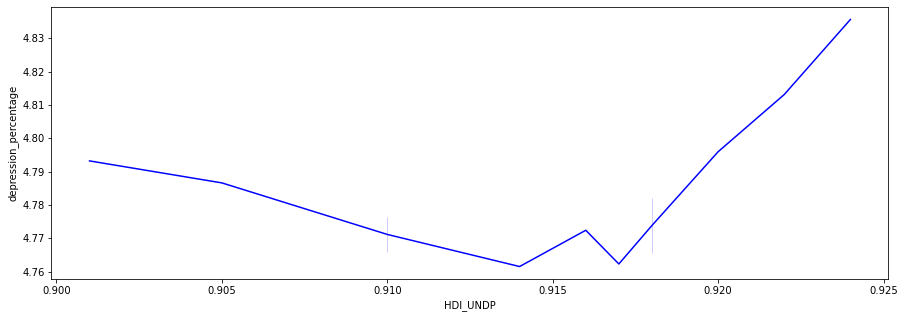

In [42]:
plot_hdi_happiness('United States')

In [43]:
df_hdi_happiness2015 = df_hdi_happiness[df_hdi_happiness['Year']==2015]
df_hdi_happiness2015

,Entity,Code,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
7,Afghanistan,AFG,2015,4.135419,0.493,3.982855,7.500539
17,Albania,ALB,2015,2.204454,0.776,4.606651,9.302960
39,Argentina,ARG,2015,3.657683,0.822,6.697131,9.858329
51,Armenia,ARM,2015,2.740289,0.748,4.348320,9.011394
62,Australia,AUS,2015,4.696774,0.936,7.309061,10.690199
...,...,...,...,...,...,...,...
1443,Venezuela,VEN,2015,2.811889,0.775,5.568800,9.655211
1455,Vietnam,VNM,2015,2.881750,0.684,5.076315,8.622428
1465,Yemen,YEM,2015,4.017056,0.483,2.982674,7.744412
1476,Zambia,ZMB,2015,3.576608,0.583,4.843164,8.196217


In [44]:
# assuming depression is cultural dependant, grouping the dataset based on countries, averaging other values
df_hdi_happiness_grouped= df_hdi_happiness.groupby('Entity').mean()

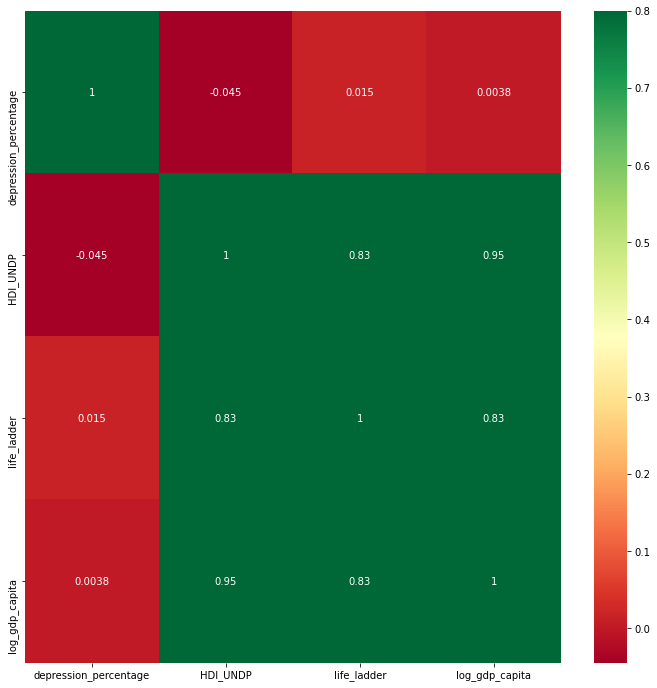

In [45]:
df_hdi_happiness_grouped_matrix = df_hdi_happiness_grouped.drop(['Year'],axis=1)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap( df_hdi_happiness_grouped_matrix.corr(), vmax=.8, annot=True,cmap='RdYlGn',annot_kws={'size':10});
f.savefig('heatmap')
# there is a high correlation between life satisfaction level (life_ladder) 
    # and gdp per capita / human development index(hdi_undp)
# there is also a high correlation between human development index 
    # and life satisfaction / gdp per capita
# the strongest correlation is between human development index / gdp per capita 
# there is no significant correlation between percentage of people suffering depression and following values:
    # (human development index, life satisfaction, gdp per capita)
# conclusion: depression seems universal, not correlated with development index or gdp per capita


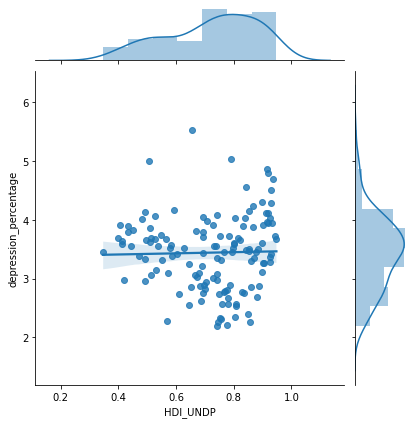

In [46]:
hh_2015 = sns.jointplot(data = df_hdi_happiness2015, y = "depression_percentage", 
                     x = "HDI_UNDP", kind='reg') 

In [47]:
df_hdi_happiness = sm.add_constant(df_hdi_happiness)
y1 =df_hdi_happiness['depression_percentage']
x1 =df_hdi_happiness[['const', 'HDI_UNDP']]
hdiDepression_lr = sm.OLS(y1,x1).fit()
hdiDepression_lr.summary()
# there is little linear relationship between depression and human development index

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     depression_percentage   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.077
Date:                   Thu, 17 Sep 2020   Prob (F-statistic):              0.300
Time:                           23:03:28   Log-Likelihood:                -1461.2
No. Observations:                   1491   AIC:                             2926.
Df Residuals:                       1489   BIC:                             2937.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3720      0.077     43.769      0.000       3.221       3.523
HDI_UNDP       0.1105      0.106      1.038      0.300      -0.098       0.319
==============================================================================
Omnibus:                       32.979   Durbin-Watson:                   0.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.884
Skew:                           0.351   Prob(JB):                     2.66e-08
Kurtosis:                       3.261   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
y1 =df_hdi_happiness['depression_percentage']
x1 =df_hdi_happiness[['const', 'HDI_UNDP', 'log_gdp_capita','life_ladder']]
hdiDepression_lr = sm.OLS(y1,x1,missing='drop').fit()
hdiDepression_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     depression_percentage   R-squared:                       0.024
Model:                               OLS   Adj. R-squared:                  0.022
Method:                    Least Squares   F-statistic:                     12.29
Date:                   Thu, 17 Sep 2020   Prob (F-statistic):           6.06e-08
Time:                           23:03:28   Log-Likelihood:                -1441.6
No. Observations:                   1488   AIC:                             2891.
Df Residuals:                       1484   BIC:                             2912.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.3111      0.205     11.301      0.000       1.910       2.712
HDI_UNDP          -1.8297      0.346     -5.286      0.000      -2.509      -1.151
log_gdp_capita     0.2364      0.047      5.078      0.000       0.145       0.328
life_ladder        0.0455      0.024      1.900      0.058      -0.001       0.092
==============================================================================
Omnibus:                       52.111   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.517
Skew:                           0.447   Prob(JB):                     3.24e-13
Kurtosis:                       3.360   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

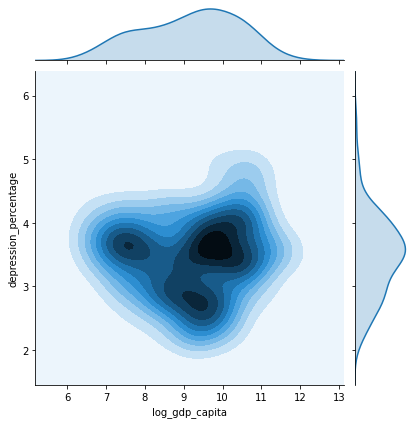

In [62]:
hh_grouped_plot = sns.jointplot(data = df_hdi_happiness_grouped, y = "depression_percentage", 
                     x = "log_gdp_capita", kind='kde') 
hh_grouped_plot.savefig('gpd_depression_allCountries')
# there are three clusters, next lets try to find out which country belongs to which cluster

In [50]:
df_hdi_happiness_grouped.head(1)

,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
Entity,,,,,
Afghanistan,2012.5,4.13295,0.4769,3.806614,7.435578


In [51]:
# we look at two clusters, both have high log_gdp_capita, differing by people suffering from depression
# no real conclusion can be drawn. the only hypothesis I can come up with is people in
    # traditional conservative countries seem less likely to suffer from depression

df_hdi_happiness_grouped=df_hdi_happiness_grouped.reset_index()

In [70]:
group1 = df_hdi_happiness_grouped.loc[(df_hdi_happiness_grouped['log_gdp_capita']>10) 
                             & (df_hdi_happiness_grouped['depression_percentage']<=3.2)]
group1.sort_values(['depression_percentage'],ascending=False)

,Entity,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
68,Japan,2011.416667,3.180025,0.892250,6.035371,10.510177
125,South Korea,2011.500000,3.023176,0.885500,5.882290,10.349377
123,Slovenia,2012.300000,2.933486,0.884100,5.932042,10.269977
145,United Arab Emirates,2012.300000,2.870824,0.847900,6.863378,11.076397
58,Hungary,2011.727273,2.774242,0.826364,5.120173,10.071533
36,Czech Republic,2012.000000,2.703947,0.868500,6.516931,10.281259
122,Slovakia,2012.666667,2.418571,0.839889,5.974343,10.189082
111,Poland,2011.727273,2.271584,0.839727,5.865575,10.031465


In [69]:
group2 = df_hdi_happiness_grouped.loc[(df_hdi_happiness_grouped['log_gdp_capita']>10) 
                             & (df_hdi_happiness_grouped['depression_percentage']>3.8)]
group2.sort_values(['depression_percentage'],ascending=False)

,Entity,Year,depression_percentage,HDI_UNDP,life_ladder,log_gdp_capita
45,Finland,2012.200000,4.923207,0.910000,7.523600,10.599315
6,Australia,2011.636364,4.784311,0.927000,7.309089,10.654931
147,United States,2011.500000,4.784239,0.914583,7.124799,10.842013
112,Portugal,2012.200000,4.662381,0.830400,5.295430,10.194749
132,Sweden,2011.416667,4.535497,0.912417,7.371307,10.688197
64,Ireland,2011.909091,4.319103,0.914091,7.063328,10.820768
46,France,2011.333333,4.301561,0.886000,6.664679,10.528614
52,Greece,2011.727273,4.287339,0.858000,5.504515,10.181106
80,Lithuania,2011.500000,4.199437,0.835833,5.718680,10.088312
146,United Kingdom,2011.416667,4.117302,0.906167,6.881425,10.538086


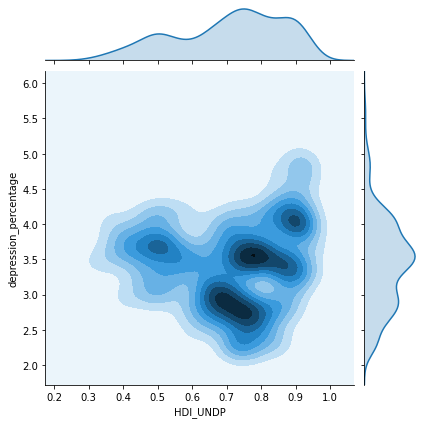

In [54]:
hh = sns.jointplot(data = df_hdi_happiness, y = "depression_percentage", 
                     x = "HDI_UNDP", kind='kde') 

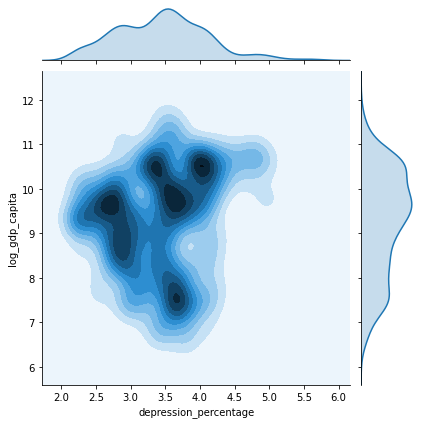

In [55]:
vis7 = sns.jointplot(data = df_hdi_happiness, x = "depression_percentage", 
                     y = "log_gdp_capita", kind='kde') 

<AxesSubplot:xlabel='log_gdp_capita', ylabel='depression_percentage'>

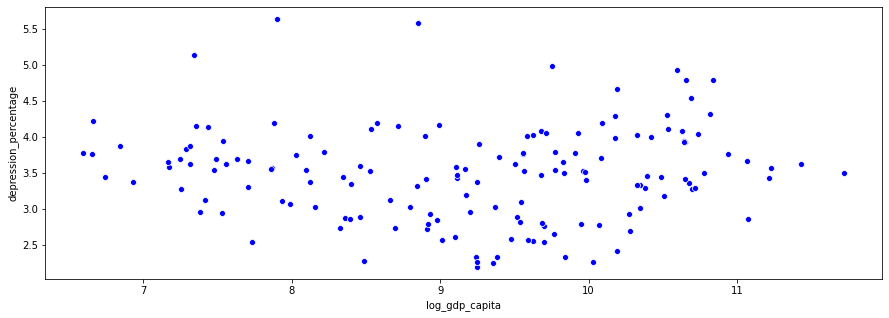

In [56]:
# depression / log_gdp_capita
fig , ax1 = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df_hdi_happiness_grouped, 
             x=df_hdi_happiness_grouped['log_gdp_capita'],
             y=df_hdi_happiness_grouped['depression_percentage'],
             color='blue',ax=ax1)

In [57]:
# depression / log_gdp_capita by country 
    
def plot_hdi_gdp(country):
    fig , ax1 = plt.subplots(figsize=(15,5))
    sns.scatterplot(data=data_country2(country), 
                 x=data_country2(country)['log_gdp_capita'],
                 y=data_country2(country)['depression_percentage'],
                 color='blue',ax=ax1)

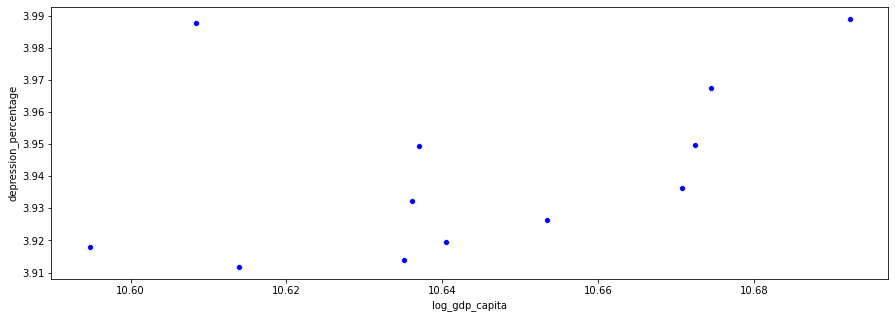

In [58]:
plot_hdi_gdp('Canada')

<AxesSubplot:xlabel='life_ladder', ylabel='depression_percentage'>

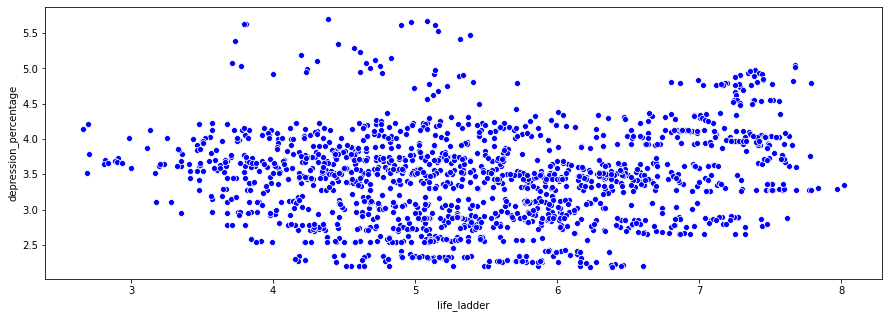

In [59]:
# depression / Happiness / hdi
fig , ax1 = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df_hdi_happiness, 
             x=df_hdi_happiness['life_ladder'],
             y=df_hdi_happiness['depression_percentage'],
             color='blue',ax=ax1)

<AxesSubplot:xlabel='HDI_UNDP', ylabel='depression_percentage'>

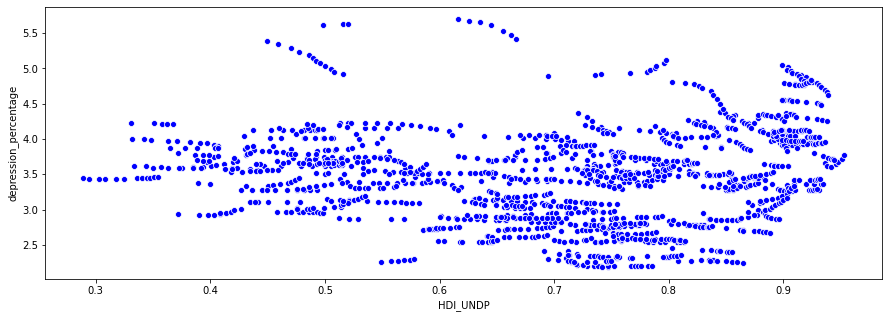

In [60]:
# depression / HDI
fig , ax1 = plt.subplots(figsize=(15,5))
sns.scatterplot(data=df_hdi_happiness, 
             x=df_hdi_happiness['HDI_UNDP'],
             y=df_hdi_happiness['depression_percentage'],
             color='blue',ax=ax1)